# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size = 1500) 
lngs = np.random.uniform(lng_range[0], lng_range[1], size = 1500) 
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set base url and units variables, and combine them to get the query url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Create empty lists to store the data for each field
city_names = []
countries = []
lat_ls = []
lng_ls = []
temp_ls = []
humidity_ls = []
cloudiness_ls = []
wind_speeds = []
dates = []

In [4]:
# Loop through cities

print("Beginning data retrieval:\n-------------------------------------------")
for city in cities:
    
    # Get the JSON response from the OpenWeather API
    response_json = requests.get(query_url + city).json()

#     print(json.dumps(response_json, indent=4, sort_keys = True))
#     break  
    
    try:
        
        city_name = response_json["name"]
        city_names.append(city_name)
        
        country = response_json["sys"]["country"]
        countries.append(country)
        
        lat = response_json["coord"]["lat"]
        lat_ls.append(lat)
        
        lng = response_json["coord"]["lon"]
        lng_ls.append(lng)
        
        temp = response_json["main"]["temp_max"]
        temp_ls.append(temp)
        
        humidity = response_json["main"]["humidity"]
        humidity_ls.append(humidity)
        
        cloudiness = response_json["clouds"]["all"]
        cloudiness_ls.append(cloudiness)
        
        wind_speed = response_json["wind"]["speed"]
        wind_speeds.append(wind_speed)
        
        date_timestamp = response_json["dt"]
        # Converting Date format
        converted_timestamp = datetime.utcfromtimestamp(date_timestamp)
        date = datetime.date(converted_timestamp)
        dates.append(date)
        
        print(f"Retrieving {city_name}, {country} success!")
        
    except (KeyError, IndexError):
        print(f"The {city_name}, {country} record doesn't exist.")
print(f"-------------------------------------------\nTotal of {len(cities)} data retrievals complete.")

Beginning data retrieval:
-------------------------------------------
Retrieving Tuktoyaktuk, CA success!
Retrieving Airai, TL success!
Retrieving Andreapol', RU success!
Retrieving Watertown, US success!
Retrieving Marmora, IT success!
Retrieving Albany, US success!
Retrieving Hilo, US success!
Retrieving Ust-Maya, RU success!
Retrieving Ilulissat, GL success!
Retrieving Buin, CL success!
Retrieving Cidreira, BR success!
Retrieving Skibbereen, IE success!
Retrieving Sept-Îles, CA success!
Retrieving Muhafazat Lahij, YE success!
Retrieving Mar del Plata, AR success!
Retrieving Nyurba, RU success!
Retrieving Vanimo, PG success!
Retrieving Thompson, CA success!
Retrieving Vaini, TO success!
Retrieving Carnarvon, AU success!
Retrieving Deputatsky, RU success!
Retrieving Nikolskoye, RU success!
Retrieving São Filipe, CV success!
Retrieving Mehamn, NO success!
Retrieving Alexandria, EG success!
Retrieving Yellowknife, CA success!
Retrieving Kathmandu, NP success!
Retrieving Rikitea, PF succ

Retrieving Nanortalik, GL success!
Retrieving Barrancabermeja, CO success!
Retrieving Amuntai, ID success!
The Amuntai, ID record doesn't exist.
Retrieving Mahébourg, MU success!
Retrieving Pindi Gheb, PK success!
The Pindi Gheb, PK record doesn't exist.
Retrieving Qasigiannguit, GL success!
Retrieving Arrondissement de Cholet, FR success!
Retrieving Verkhnevilyuysk, RU success!
Retrieving Narsaq, GL success!
Retrieving Sirte, LY success!
Retrieving Petropavlovsk-Kamchatskiy, RU success!
Retrieving Paamiut, GL success!
Retrieving Kolodeznyy, RU success!
Retrieving Taksimo, RU success!
Retrieving Zhigansk, RU success!
Retrieving Nizhniy Tsasuchey, RU success!
Retrieving Lima, PE success!
The Lima, PE record doesn't exist.
Retrieving Tavda, RU success!
Retrieving Sunland Park, US success!
Retrieving Hofn, IS success!
Retrieving São João da Barra, BR success!
Retrieving Nānākuli, US success!
Retrieving Ginda, IN success!
Retrieving Hessisch Lichtenau, DE success!
Retrieving Inhambane, MZ 

Retrieving Kidal, ML success!
Retrieving Rüdesheim an der Nahe, DE success!
Retrieving Kerewan, GM success!
Retrieving Sarkand, KZ success!
Retrieving Iporá, BR success!
Retrieving Iguape, BR success!
Retrieving San Isidro, PE success!
The San Isidro, PE record doesn't exist.
The San Isidro, PE record doesn't exist.
Retrieving Kemijärvi, FI success!
Retrieving Naze, JP success!
Retrieving Kinablangan, PH success!
Retrieving Cauquenes, CL success!
Retrieving Ovsyanka, RU success!
Retrieving Puerto Escondido, MX success!
Retrieving Ghazīpur, IN success!
Retrieving Lancaster, US success!
Retrieving Sawankhalok, TH success!
Retrieving Davidson, US success!
Retrieving Upington, ZA success!
Retrieving Nakhon Thai, TH success!
Retrieving Raudeberg, NO success!
Retrieving San Lorenzo, PY success!
Retrieving Manjhanpur, IN success!
Retrieving Mitzic, GA success!
Retrieving Władysławowo, PL success!
The Władysławowo, PL record doesn't exist.
Retrieving Tanout, NE success!
Retrieving Puerto Mader

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Display the DataFrame
cities_df = pd.DataFrame({"City": city_names, "Country": countries, "Latitude": lat_ls, \
                          "Longitude": lng_ls, "Max Temperature (F)": temp_ls, "Humidity (%)": humidity_ls, \
                          "Cloudiness (%)": cloudiness_ls, "Wind Speed (mph)": wind_speeds, "Date": date})

cities_df.head()

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
0,Tuktoyaktuk,CA,69.4541,-133.0374,26.60,93,90,6.91,2021-10-17
1,Airai,TL,-8.9266,125.4092,63.00,82,13,1.95,2021-10-17
2,Andreapol',RU,56.6513,32.2664,41.20,92,100,7.23,2021-10-17
3,Watertown,US,42.3709,-71.1828,59.13,68,40,3.00,2021-10-17
4,Marmora,IT,44.4583,7.0940,43.07,79,10,4.43,2021-10-17


In [6]:
cities_df.describe()

,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,20.383698,20.602119,59.277040,71.614711,56.952715,7.704238
std,33.770420,89.563525,20.790862,21.584320,38.769986,6.045966
min,-54.800000,-179.166700,-14.710000,7.000000,0.000000,0.000000
25%,-8.760800,-56.573200,43.745000,62.000000,17.000000,3.420000
50%,24.700000,24.662200,64.870000,77.000000,72.000000,6.170000
75%,48.872700,96.785000,76.820000,88.000000,97.000000,10.380000
max,78.218600,178.416700,94.230000,100.000000,100.000000,41.200000


In [7]:
# Export the city data into a .csv

cities_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
cities_df.loc[cities_df["Humidity (%)"]>100]

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date


In [9]:
#  Get the indices of cities that have humidity over 100%.
high_humidity = cities_df.loc[cities_df["Humidity (%)"] > 100].index
high_humidity

Int64Index([], dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_df = cities_df.drop(high_humidity, inplace = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [11]:
# set up x, y for scatter plots
x_lat = clean_city_df["Latitude"]
y_temp = clean_city_df["Max Temperature (F)"]
y_humid = clean_city_df["Humidity (%)"]
y_cloud = clean_city_df["Cloudiness (%)"]
y_wind = clean_city_df["Wind Speed (mph)"]

## Latitude vs. Temperature Plot

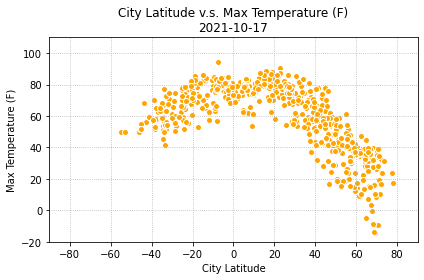

In [12]:
plt.figure(figsize = (6,4))
plt.scatter(x_lat, y_temp, marker = "o", color = "orange", edgecolor = "white")

plt.title(f"City Latitude v.s. Max Temperature (F)\n{date}")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-90, 90)
plt.ylim(-20, 110)
plt.grid(linestyle = ":")

plt.tight_layout()
plt.savefig("output_image/Lat_vs_Temp")
plt.show()

## Latitude vs. Humidity Plot

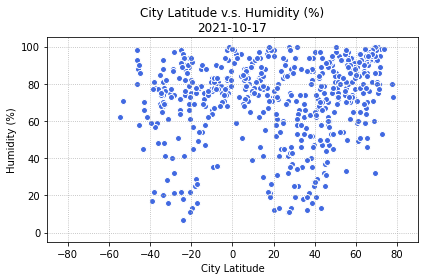

In [13]:
plt.figure(figsize = (6,4))
plt.scatter(x_lat, y_humid, marker = "o", color = "royalblue", edgecolor = "white")

plt.title(f"City Latitude v.s. Humidity (%)\n{date}")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-90, 90)
plt.ylim(-5, 105)
plt.grid(linestyle = ":")

plt.tight_layout()
plt.savefig("output_image/Lat_vs_Humid")
plt.show()

## Latitude vs. Cloudiness Plot

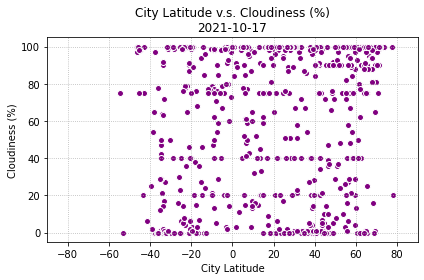

In [14]:
plt.figure(figsize = (6,4))
plt.scatter(x_lat, y_cloud, marker = "o", color = "purple", edgecolor = "white")

plt.title(f"City Latitude v.s. Cloudiness (%)\n{date}")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-90, 90)
plt.ylim(-5, 105)
plt.grid(linestyle = ":")

plt.tight_layout()
plt.savefig("output_image/Lat_vs_Cloud")
plt.show()

## Latitude vs. Wind Speed Plot

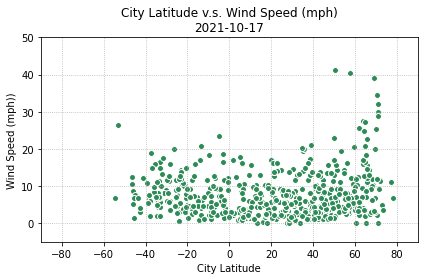

In [15]:
plt.figure(figsize = (6,4))
plt.scatter(x_lat, y_wind, marker = "o", color = "seagreen", edgecolor = "white")

plt.title(f"City Latitude v.s. Wind Speed (mph)\n{date}")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph))")
plt.xlim(-90, 90)
plt.ylim(-5, 50)
plt.grid(linestyle = ":")

plt.tight_layout()
plt.savefig("output_image/Lat_vs_Wind")
plt.show()

## Linear Regression

In [16]:
n_hemisphere_df = clean_city_df.loc[clean_city_df["Latitude"] >= 0]
s_hemisphere_df = clean_city_df.loc[clean_city_df["Latitude"] < 0]
s_hemisphere_df.head()

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
1,Airai,TL,-8.9266,125.4092,63.00,82,13,1.95,2021-10-17
9,Buin,CL,-33.7333,-70.7500,77.32,20,0,4.76,2021-10-17
10,Cidreira,BR,-30.1811,-50.2056,61.11,75,50,9.01,2021-10-17
14,Mar del Plata,AR,-38.0023,-57.5575,58.08,22,0,1.99,2021-10-17
16,Vanimo,PG,-2.6741,141.3028,80.40,78,91,5.37,2021-10-17


In [17]:
# set a function to create Linear Regression plots

def linregress_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_squared = round(rvalue**2,2)

    plt.scatter(x, y, marker = "o", color = color, edgecolor = "white")
    plt.plot(x,regress_values,"r-")
    
    # add the linear regression equation and line
    plt.annotate(line_eq, position, fontsize = 15, color = "red", fontweight = "bold")
    plt.title(f"{title}\n{date}")
    plt.xlabel("City Latitude")
    plt.ylabel(y_label)
    print(f"The r-squared is: {rvalue}")
    
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8494269615127189


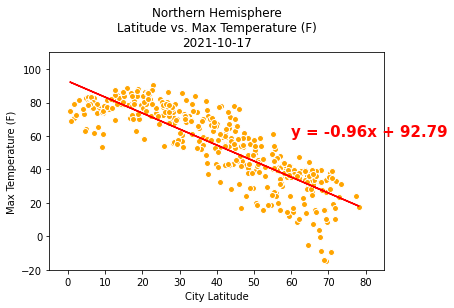

None


<Figure size 432x288 with 0 Axes>

In [18]:
x = n_hemisphere_df["Latitude"]
y = n_hemisphere_df["Max Temperature (F)"]
y_label = "Max Temperature (F)"
title = f"Northern Hemisphere\nLatitude vs. {y_label}"
color = "orange"
position = (60, 60)

plt.xlim(-5, 85)
plt.ylim(-20, 110)

print(linregress_plot(x,y))
plt.savefig("output_image/linreg_N_Temp")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7146407821459626


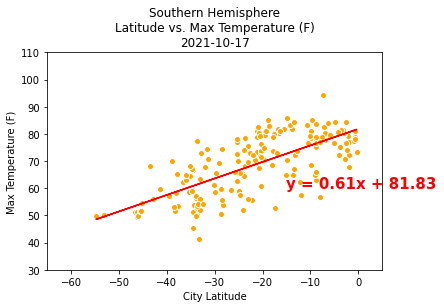

None


<Figure size 432x288 with 0 Axes>

In [19]:
x = s_hemisphere_df["Latitude"]
y = s_hemisphere_df["Max Temperature (F)"]
y_label = "Max Temperature (F)"
title = f"Southern Hemisphere\nLatitude vs. {y_label}"
color = "orange"
position = (-15, 60)


plt.xlim(-65, 5)
plt.ylim(30, 110)

print(linregress_plot(x,y))
plt.savefig("output_image/linreg_S_Temp")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.15853102383555093


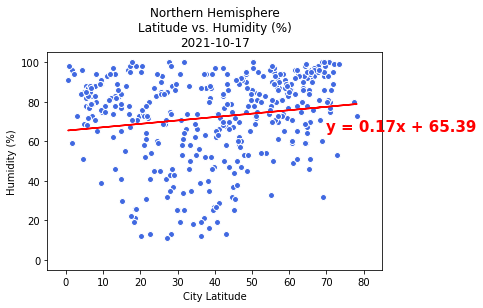

None


<Figure size 432x288 with 0 Axes>

In [20]:
x = n_hemisphere_df["Latitude"]
y = n_hemisphere_df["Humidity (%)"]
y_label = "Humidity (%)"
title = f"Northern Hemisphere\nLatitude vs. {y_label}"
color = "royalblue"
position = (70, 65)

plt.xlim(-5, 85)
plt.ylim(-5, 105)

print(linregress_plot(x,y))
plt.savefig("output_image/linreg_N_Humid")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.18290843283976538


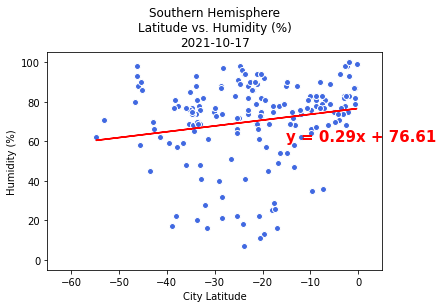

None


<Figure size 432x288 with 0 Axes>

In [21]:
x = s_hemisphere_df["Latitude"]
y = s_hemisphere_df["Humidity (%)"]
y_label = "Humidity (%)"
title = f"Southern Hemisphere\nLatitude vs. {y_label}"
color = "royalblue"
position = (-15, 60)

plt.xlim(-65, 5)
plt.ylim(-5, 105)

print(linregress_plot(x,y))
plt.savefig("output_image/linreg_S_Humid")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.10819150208831825


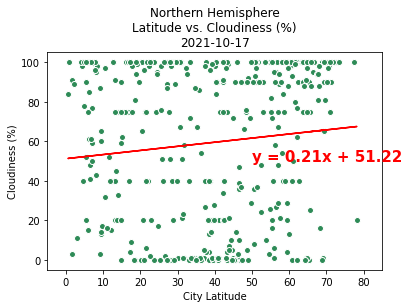

None


<Figure size 432x288 with 0 Axes>

In [22]:
x = n_hemisphere_df["Latitude"]
y = n_hemisphere_df["Cloudiness (%)"]
y_label = "Cloudiness (%)"
title = f"Northern Hemisphere\nLatitude vs. {y_label}"
color = "seagreen"
position = (50, 50)

plt.xlim(-5, 85)
plt.ylim(-5, 105)

print(linregress_plot(x,y))
plt.savefig("output_image/linreg_N_Cloud")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1823401649281025


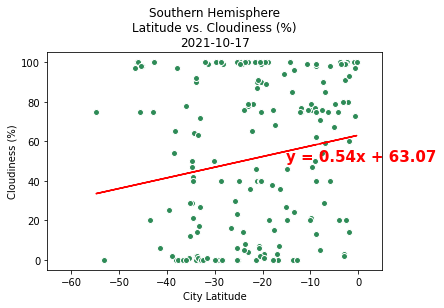

None


<Figure size 432x288 with 0 Axes>

In [23]:
x = s_hemisphere_df["Latitude"]
y = s_hemisphere_df["Cloudiness (%)"]
y_label = "Cloudiness (%)"
title = f"Southern Hemisphere\nLatitude vs. {y_label}"
color = "seagreen"
position = (-15, 50)

plt.xlim(-65, 5)
plt.ylim(-5, 105)

print(linregress_plot(x,y))
plt.savefig("output_image/linreg_S_Cloud")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.2490483150103586


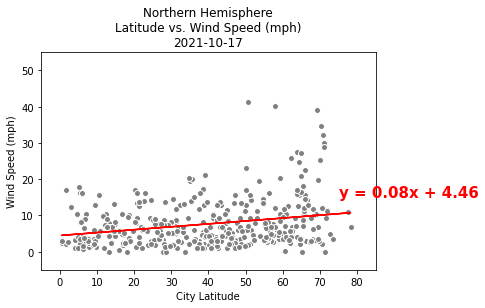

None


<Figure size 432x288 with 0 Axes>

In [24]:
x = n_hemisphere_df["Latitude"]
y = n_hemisphere_df["Wind Speed (mph)"]
y_label = "Wind Speed (mph)"
title = f"Northern Hemisphere\nLatitude vs. {y_label}"
color = "gray"
position = (75, 15)

plt.xlim(-5, 85)
plt.ylim(-5, 55)

print(linregress_plot(x,y))
plt.savefig("output_image/linreg_N_Wind")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.1493707966835315


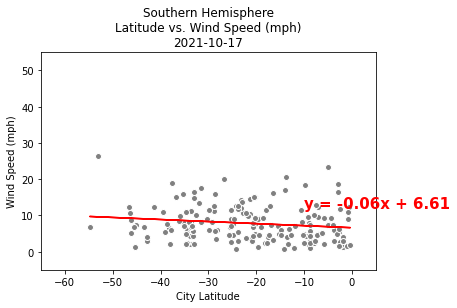

None


<Figure size 432x288 with 0 Axes>

In [25]:
x = s_hemisphere_df["Latitude"]
y = s_hemisphere_df["Wind Speed (mph)"]
y_label = "Wind Speed (mph)"
title = f"Southern Hemisphere\nLatitude vs. {y_label}"
color = "gray"
position = (-10, 12)

plt.xlim(-65, 5)
plt.ylim(-5, 55)

print(linregress_plot(x,y))
plt.savefig("output_image/linreg_S_Wind")